<a href="https://colab.research.google.com/github/HyeJung-Hwang/Statistic_Learning_Theory/blob/main/NN%EB%AA%A8%EB%8D%B8%EB%A1%9C_MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [ ]:
mnist_transform=transforms.Compose([
                              transforms.Resize((28,28)),
                              transforms.ToTensor(), # first, convert image to PyTorch (float) tensor
                              transforms.Normalize((0.5,), (0.5,)) # normalize inputs, x' = (x-u)/std, x'=[-1, 1] 
                              ])     


In [ ]:
train_dataset = datasets.MNIST(root='./mnist_data', 
                                  train=True, 
                                  download=True, 
                                  transform=mnist_transform)
#print(train_dataset)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True) 

test_dataset = datasets.MNIST(root='./mnist_data', 
                                  train=False, 
                                  download=True, 
                                  transform=mnist_transform)
#print(train_dataset)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False) 

# **contruct model architecture

model depth= 4 (h1=2000,h2=2000,h3=1000,h4=1000)

In [ ]:
class NN_MNIST(nn.Module):
  def __init__(self, NN_in, H1,H2,H3,H4,NN_out):  #NN_in , 추가, NN_out
    super().__init__()
    self.linear1 = nn.Linear(NN_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, H3)
    self.linear4 = nn.Linear(H3, H4)
    self.linear5 = nn.Linear(H4, NN_out)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = F.relu(self.linear3(x))
    x = F.relu(self.linear4(x))
    x = self.linear5(x) # activation not needed for multi-class classification task
    return x

#** make model instance 


In [ ]:
torch.manual_seed(1)
model = NN_MNIST(784,2000,2000,1000,1000,10)
model

NN_MNIST(
  (linear1): Linear(in_features=784, out_features=2000, bias=True)
  (linear2): Linear(in_features=2000, out_features=2000, bias=True)
  (linear3): Linear(in_features=2000, out_features=1000, bias=True)
  (linear4): Linear(in_features=1000, out_features=1000, bias=True)
  (linear5): Linear(in_features=1000, out_features=10, bias=True)
)

# optimizer 

**learning rate를 0.1로 높임

In [ ]:
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss() # cf. BCE()

**epoch수를 40으로 높임

In [ ]:
epochs = 40
running_loss_history = []
running_corrects_history = []
val_loss_history = []
val_corrects_history = []
for eno in range(epochs):

  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  # a batch of 100 images x 600 batches -> 60,000 for a single epoch 
  for inputs, labels in train_loader:     
    # input [100(batch size), 1(channel), 28(width), 28(height)] =>     
    inputs = inputs.view(inputs.shape[0], -1) # [100, 784]
    outputs = model(inputs) # logits (scores)
    loss = criterion(outputs, labels) # outputs [100, 1], labels [100]
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #max function output(max, max_indices)
    _, pred_idx = torch.max(outputs, 1) # 2nd argument - the dim to reduce    

    running_loss += loss.item() # loss per batch 
    running_corrects += torch.sum(pred_idx == labels.data)

    # 학습 종료 후 
  else:
    with torch.no_grad():
        for val_inputs, val_labels in test_loader:     
    # input [100(batch size), 1(channel), 28(width), 28(height)] =>     
            val_inputs = val_inputs.view(val_inputs.shape[0], -1) # [100, 784]
            val_outputs = model(val_inputs) # logits (scores)
            val_loss = criterion(val_outputs, val_labels) # outputs [100, 1], labels [100]
            _, val_preds = torch.max(val_outputs, 1) # 2nd argument - the dim to reduce    
            val_running_loss += loss.item() # loss per batch 
            val_running_corrects += torch.sum(val_preds == val_labels.data)


        epoch_loss = running_loss/len(train_loader) 
        running_loss_history.append(epoch_loss)
        epoch_acc = (running_corrects.float()/inputs.shape[0]*100)/len(train_loader) 
        running_corrects_history.append(epoch_acc)

        val_epoch_loss = val_running_loss/len(test_loader) 
        val_loss_history.append(val_epoch_loss) #
        epoch_val_acc = (val_running_corrects.float()/inputs.shape[0]*100)/len(test_loader) 
        val_corrects_history.append(epoch_val_acc) #
        print('--------------- epoch: ', (eno+1), '---------------')
        print('training loss: {:.4f}, accuracy {:.4f},val loss: {:.4f},val accuracy {:.4f}'.format(epoch_loss, epoch_acc.item(),val_epoch_loss,epoch_val_acc.item()))   

--------------- epoch:  1 ---------------
training loss: 0.6435, accuracy 79.4750,val loss: 0.1153,val accuracy 94.0800
--------------- epoch:  2 ---------------
training loss: 0.1854, accuracy 94.3567,val loss: 0.2110,val accuracy 90.5800
--------------- epoch:  3 ---------------
training loss: 0.1166, accuracy 96.3733,val loss: 0.0904,val accuracy 96.3900
--------------- epoch:  4 ---------------
training loss: 0.0999, accuracy 96.9967,val loss: 0.0862,val accuracy 96.7400
--------------- epoch:  5 ---------------
training loss: 0.0725, accuracy 97.7033,val loss: 0.0320,val accuracy 97.5200
--------------- epoch:  6 ---------------
training loss: 0.0554, accuracy 98.2617,val loss: 0.1219,val accuracy 97.2800
--------------- epoch:  7 ---------------
training loss: 0.1713, accuracy 95.8383,val loss: 0.0646,val accuracy 97.5600
--------------- epoch:  8 ---------------
training loss: 0.0530, accuracy 98.3233,val loss: 0.0645,val accuracy 95.6400
--------------- epoch:  9 --------------

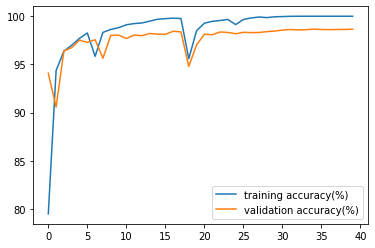

In [ ]:
plt.plot(running_corrects_history, label='training accuracy(%)')
plt.plot(val_corrects_history, label='validation accuracy(%)')
plt.legend()

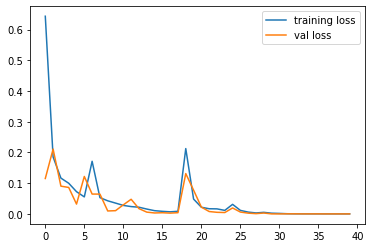

In [ ]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_loss_history, label='val loss')
plt.legend()